In [11]:
import os
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '0.1' 

import numpy as np
from temgym_core.components import Lens, Detector, Biprism
from temgym_core.source import ParallelBeam
from temgym_core.gaussian import make_gaussian_image, GaussianRay, evaluate_gaussian_input_image
from temgym_core.run import run_to_end, run_iter
from temgym_core.ray import Ray
import jax
import matplotlib.pyplot as plt

jax.config.update("jax_enable_x64", True)

%matplotlib widget

In [12]:
pixel_size = 1e-4
detector = Detector(z=1, pixel_size=(pixel_size, pixel_size), shape=(2048, 2048))

#Detector coordinates
wavelength = 1e-5
wo = 1e-4
k = 2 * np.pi / wavelength

input_ray1 = GaussianRay(
    x=0.0,
    y=0.0,
    dx=1e-2,
    dy=0.0,
    wavelength=wavelength,
    waist_xy=(wo, wo),
    radii_of_curv=(0.01, 0.01),
    z=0.0,
    pathlength=0.0,
    amplitude=1.0,
    theta=0.0,
)

out_1 = make_gaussian_image(input_ray1, [detector], batch_size=1)

input_ray2 = GaussianRay(
    x=0.0,
    y=0.0,
    dx=5e-2,
    dy=0.0,
    wavelength=wavelength,
    waist_xy=(wo, wo),
    radii_of_curv=(0.01, 0.01),
    z=0.0,
    pathlength=0.0,
    amplitude=1.0,
    theta=0.0,
)

out_2 = make_gaussian_image(input_ray2, [detector], batch_size=1)

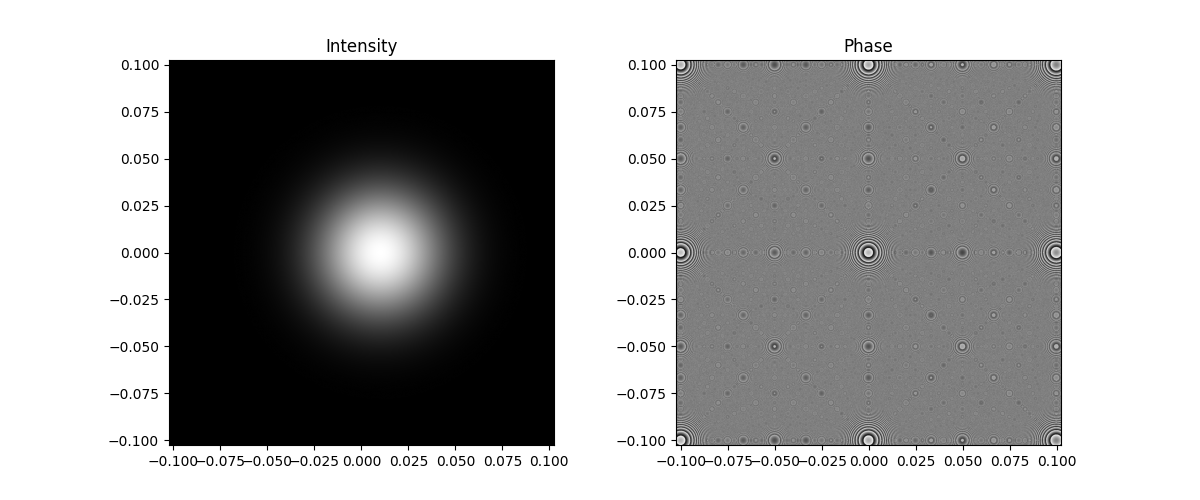

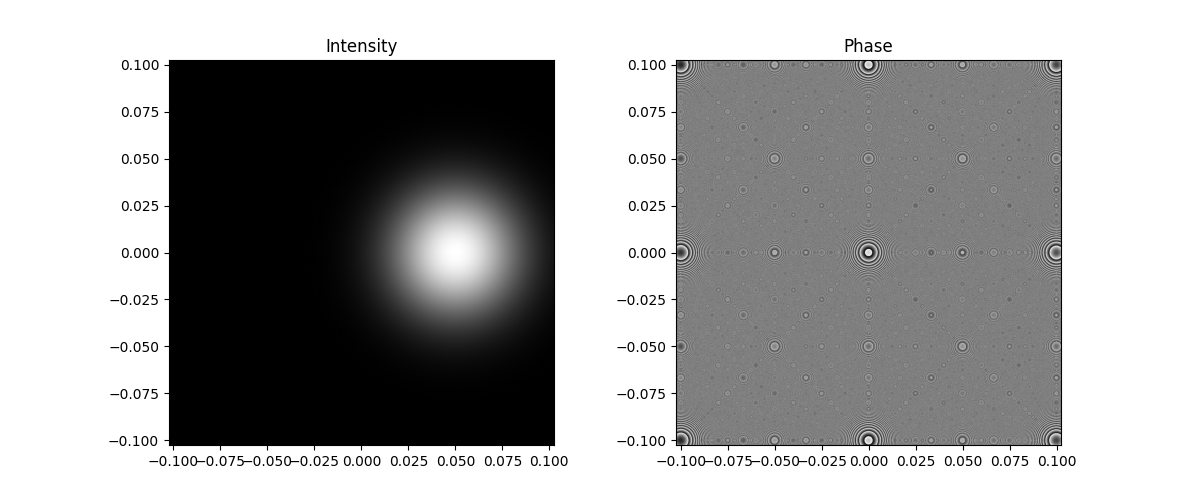

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].imshow(np.abs(out_1), cmap="gray", extent=[-detector.pixel_size[0]*detector.shape[0]/2, detector.pixel_size[0]*detector.shape[0]/2, -detector.pixel_size[1]*detector.shape[1]/2, detector.pixel_size[1]*detector.shape[1]/2])
axs[0].set_title("Intensity")
axs[1].imshow(np.angle(out_1), cmap="gray", extent=[-detector.pixel_size[0]*detector.shape[0]/2, detector.pixel_size[0]*detector.shape[0]/2, -detector.pixel_size[1]*detector.shape[1]/2, detector.pixel_size[1]*detector.shape[1]/2])
axs[1].set_title("Phase")
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].imshow(np.abs(out_2), cmap="gray", extent=[-detector.pixel_size[0]*detector.shape[0]/2, detector.pixel_size[0]*detector.shape[0]/2, -detector.pixel_size[1]*detector.shape[1]/2, detector.pixel_size[1]*detector.shape[1]/2])
axs[0].set_title("Intensity")
axs[1].imshow(np.angle(out_2), cmap="gray", extent=[-detector.pixel_size[0]*detector.shape[0]/2, detector.pixel_size[0]*detector.shape[0]/2, -detector.pixel_size[1]*detector.shape[1]/2, detector.pixel_size[1]*detector.shape[1]/2])
axs[1].set_title("Phase")
plt.show()

Biprism solution to add tilt

In [14]:
pixel_size = 1e-4
biprism = Biprism(z=0.0, def_x=1e-2)
detector = Detector(z=1, pixel_size=(pixel_size, pixel_size), shape=(2048, 2048))

#Detector coordinates
wavelength = 1e-5
wo = 1e-4
k = 2 * np.pi / wavelength

input_ray1 = GaussianRay(
    x=1e-13,
    y=0.0,
    dx=0.0,
    dy=0.0,
    wavelength=wavelength,
    waist_xy=(wo, wo),
    radii_of_curv=(0.01, 0.01),
    z=0.0,
    pathlength=0.0,
    amplitude=1.0,
    theta=0.0,
)

out_1_bip = make_gaussian_image(input_ray1, [biprism, detector], batch_size=1)

biprism = Biprism(z=0.0, def_x=5e-2)
detector = Detector(z=1, pixel_size=(pixel_size, pixel_size), shape=(2048, 2048))

input_ray2 = GaussianRay(
    x=1e-13,
    y=0.0,
    dx=0.0,
    dy=0.0,
    wavelength=wavelength,
    waist_xy=(wo, wo),
    radii_of_curv=(0.01, 0.01),
    z=0.0,
    pathlength=0.0,
    amplitude=1.0,
    theta=0.0,
)

out_2_bip = make_gaussian_image(input_ray2, [biprism, detector], batch_size=1)

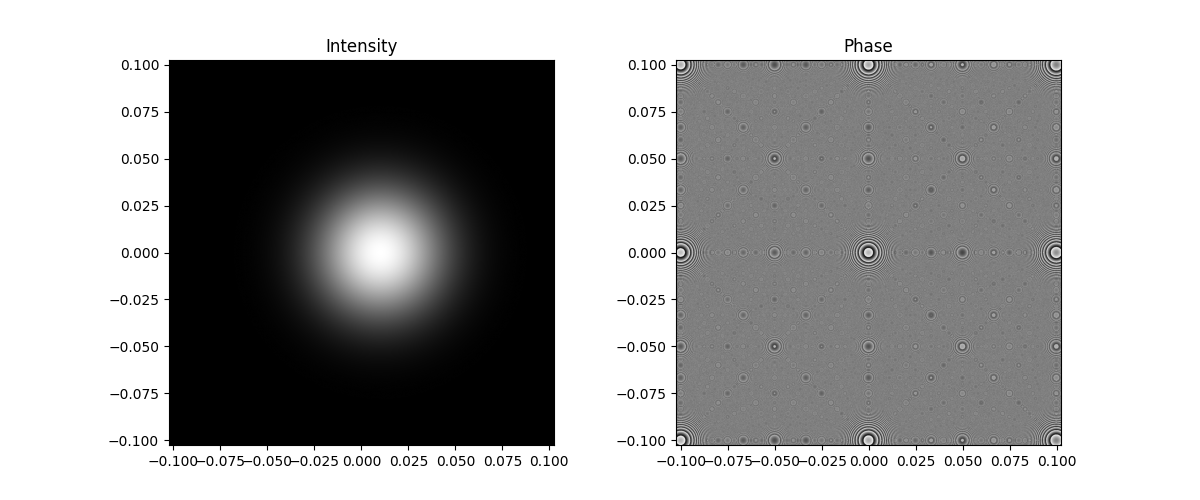

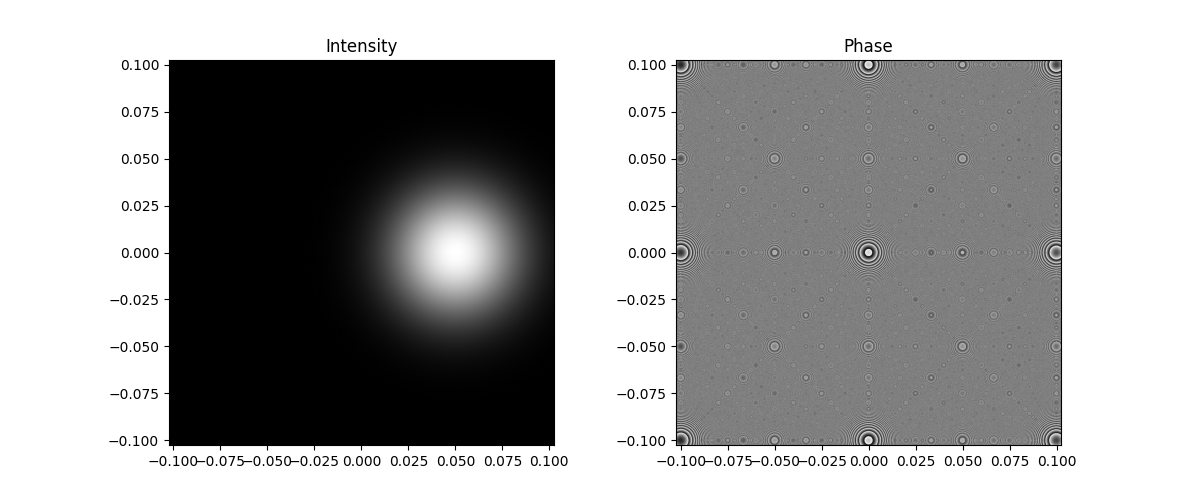

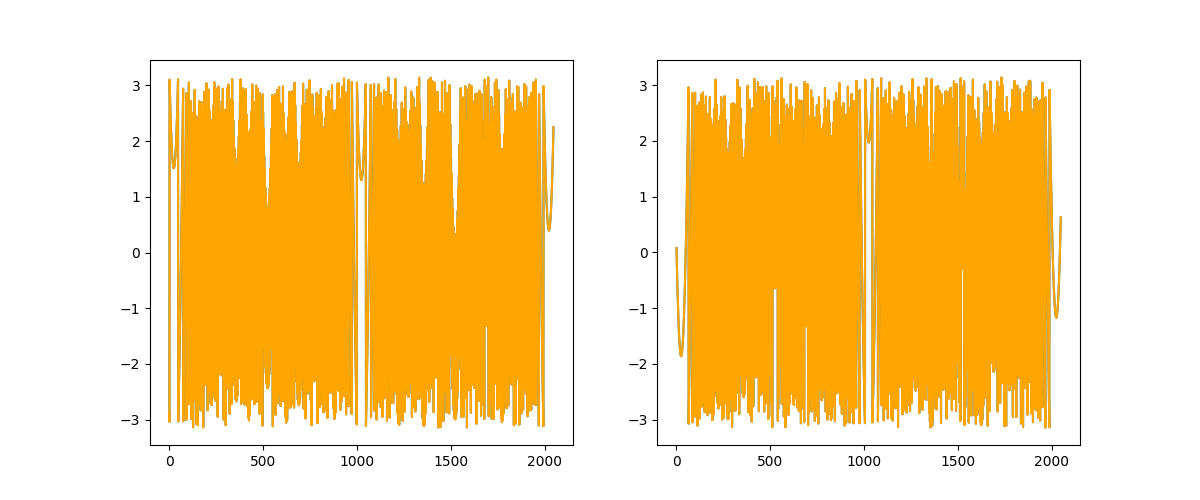

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].imshow(np.abs(out_1_bip), cmap="gray", extent=[-detector.pixel_size[0]*detector.shape[0]/2, detector.pixel_size[0]*detector.shape[0]/2, -detector.pixel_size[1]*detector.shape[1]/2, detector.pixel_size[1]*detector.shape[1]/2])
axs[0].set_title("Intensity")
axs[1].imshow(np.angle(out_1_bip), cmap="gray", extent=[-detector.pixel_size[0]*detector.shape[0]/2, detector.pixel_size[0]*detector.shape[0]/2, -detector.pixel_size[1]*detector.shape[1]/2, detector.pixel_size[1]*detector.shape[1]/2])
axs[1].set_title("Phase")
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].imshow(np.abs(out_2_bip), cmap="gray", extent=[-detector.pixel_size[0]*detector.shape[0]/2, detector.pixel_size[0]*detector.shape[0]/2, -detector.pixel_size[1]*detector.shape[1]/2, detector.pixel_size[1]*detector.shape[1]/2])
axs[0].set_title("Intensity")
axs[1].imshow(np.angle(out_2_bip), cmap="gray", extent=[-detector.pixel_size[0]*detector.shape[0]/2, detector.pixel_size[0]*detector.shape[0]/2, -detector.pixel_size[1]*detector.shape[1]/2, detector.pixel_size[1]*detector.shape[1]/2])
axs[1].set_title("Phase")
plt.show()

fig_cross_section, axs_cross_section = plt.subplots(1, 2, figsize=(12, 5))
axs_cross_section[0].plot(np.angle(out_1[detector.shape[0]//2, :]))
axs_cross_section[0].plot(np.angle(out_1_bip[detector.shape[0]//2, :]), color='orange')
axs_cross_section[1].plot(np.angle(out_2[detector.shape[0]//2, :]))
axs_cross_section[1].plot(np.angle(out_2_bip[detector.shape[0]//2, :]), color='orange')

Biprism With Lens

In [ ]:
scale = 1e6
M1 = -100
F1= 5e-3 * scale
defocus = 1e-10 * scale
L1_z1 = F1 * (1/M1 - 1)
L1_z2 = F1 * (1 - M1)

pixel_size = 0.1e-6 * scale
input = ParallelBeam(z=0.0 - defocus, radius=1e-3)
lens = Lens(z=abs(L1_z1), focal_length=F1)
biprism = Biprism(z=abs(L1_z2) + L1_z2/2, def_x=-0.4e-4)
detector = Detector(z=abs(L1_z2) + L1_z2, pixel_size=(pixel_size, pixel_size), shape=(1024, 1024))

#Detector coordinates
wavelength = 2e-12 * scale
wo = 1.0e-7 * scale
k = 2 * np.pi / wavelength

input_ray_left = GaussianRay(
    x=0.5e-7 * scale,
    y=0.0,
    dx=0.0,
    dy=0.0,
    wavelength=wavelength,
    waist_xy=(wo, wo),
    radii_of_curv=(np.inf, np.inf),
    z=input.z,
    pathlength=0.0,
    amplitude=1.0,
    theta=0.0,
)

input_ray_right = GaussianRay(
    x=-0.5e-7 * scale,
    y=0.0,
    dx=0.0,
    dy=0.0,
    wavelength=wavelength,
    waist_xy=(wo, wo),
    radii_of_curv=(np.inf, np.inf),
    z=input.z,
    pathlength=0.0,
    amplitude=1.0,
    theta=0.0,
)

out_left = make_gaussian_image(input_ray_left, [input, lens, biprism, detector], batch_size=1)
out_right = make_gaussian_image(input_ray_right, [input, lens, biprism, detector], batch_size=1)
out_bip_interf = out_left + out_right

left_rays = input_ray_left.to_ray()
right_rays = input_ray_right.to_ray()
out_rays_left = run_to_end(left_rays, [input, lens, biprism, detector])
out_rays_right = run_to_end(right_rays, [input, lens, biprism, detector])

In [18]:
from jaxgym.utils import custom_jacobian_matrix
central_ray_right = Ray(x=1e-12, y=0.0, dx=0.0, dy=0.0, z=input.z, pathlength=0.0)
jac_central_ray_right = jax.jacobian(run_to_end, argnums=0)(central_ray_right, [input, lens, biprism, detector])
ABCD = custom_jacobian_matrix(jac_central_ray_right)

print(ABCD)

[[-1.999900e+02  0.000000e+00 -4.999520e+03  0.000000e+00  1.010000e+01]
 [ 0.000000e+00 -1.999900e+02  0.000000e+00 -4.999520e+03  0.000000e+00]
 [-2.000000e-04  0.000000e+00 -1.000002e-02  0.000000e+00  4.000000e-05]
 [ 0.000000e+00 -2.000000e-04  0.000000e+00 -1.000002e-02  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]


Text(0.5, 1.0, 'Phase')

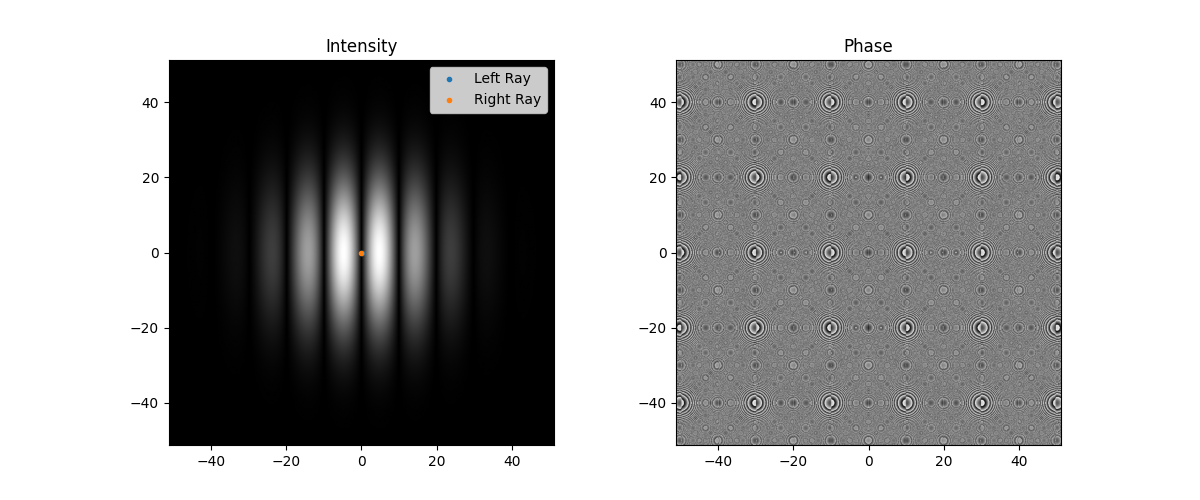

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(out_rays_left.x, out_rays_left.y, '.', label='Left Ray')
axs[0].plot(out_rays_right.x, out_rays_right.y, '.', label='Right Ray')
axs[0].legend()
axs[0].imshow(np.abs(out_bip_interf), cmap="gray", extent=[-detector.pixel_size[0]*detector.shape[0]/2, detector.pixel_size[0]*detector.shape[0]/2, -detector.pixel_size[1]*detector.shape[1]/2, detector.pixel_size[1]*detector.shape[1]/2])
axs[0].set_title("Intensity")
axs[1].imshow(np.angle(out_bip_interf), cmap="gray", extent=[-detector.pixel_size[0]*detector.shape[0]/2, detector.pixel_size[0]*detector.shape[0]/2, -detector.pixel_size[1]*detector.shape[1]/2, detector.pixel_size[1]*detector.shape[1]/2])
axs[1].set_title("Phase")
